## Sales Prediction using Advertising Spends

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('Advertising.csv')

### Analysis of Data

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

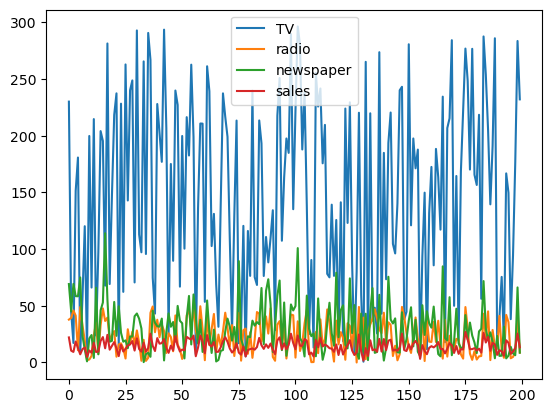

In [5]:
df.plot()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
#Checking for correlations
corr_matrix = df.corr()
corr_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


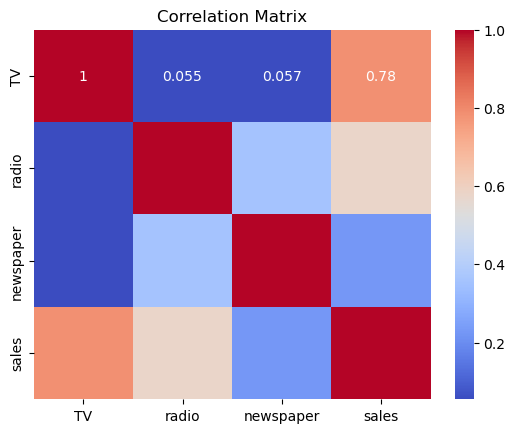

In [9]:

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

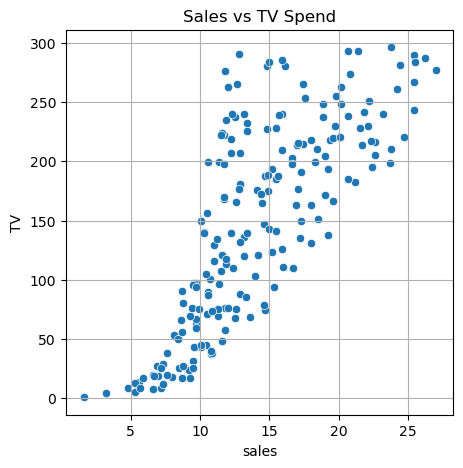

In [10]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x="sales", y="TV" )
plt.title("Sales vs TV Spend")

plt.grid()
plt.show()

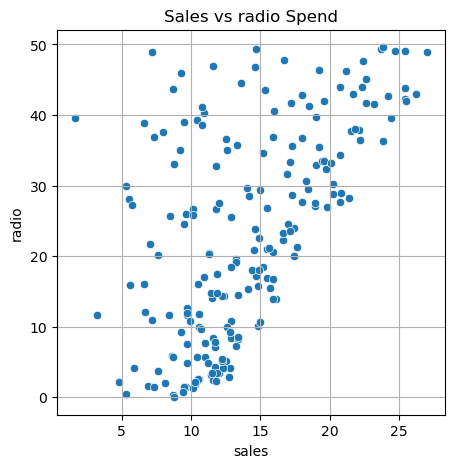

In [11]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x="sales", y="radio" )
plt.title("Sales vs radio Spend")

plt.grid()
plt.show()

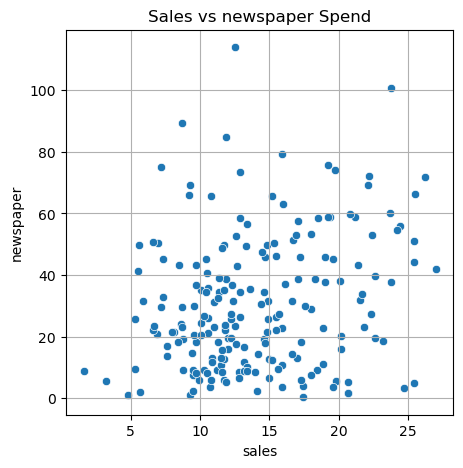

In [12]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x="sales", y="newspaper" )
plt.title("Sales vs newspaper Spend")

plt.grid()
plt.show()

<Axes: xlabel='sales', ylabel='TV'>

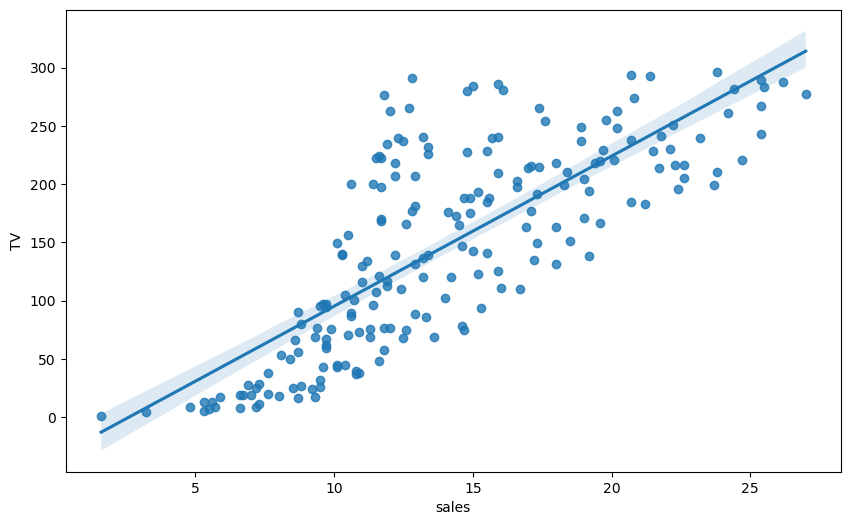

In [13]:
#Relation between sales and tv ad cost

plt.figure(figsize=(10, 6))
sns.regplot(x=df["sales"],y=df["TV"])


<Axes: xlabel='sales', ylabel='newspaper'>

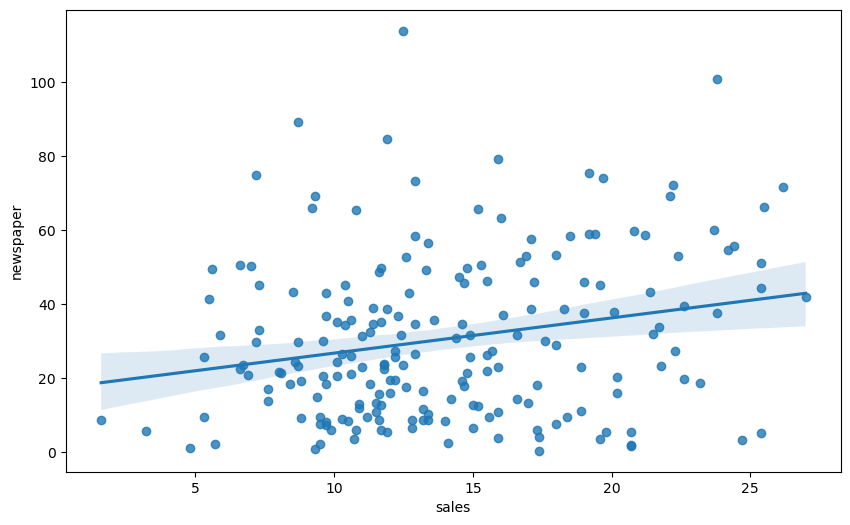

In [14]:
#Relation between sales and newspaper ad cost

plt.figure(figsize=(10, 6))
sns.regplot(x=df["sales"],y=df["newspaper"])


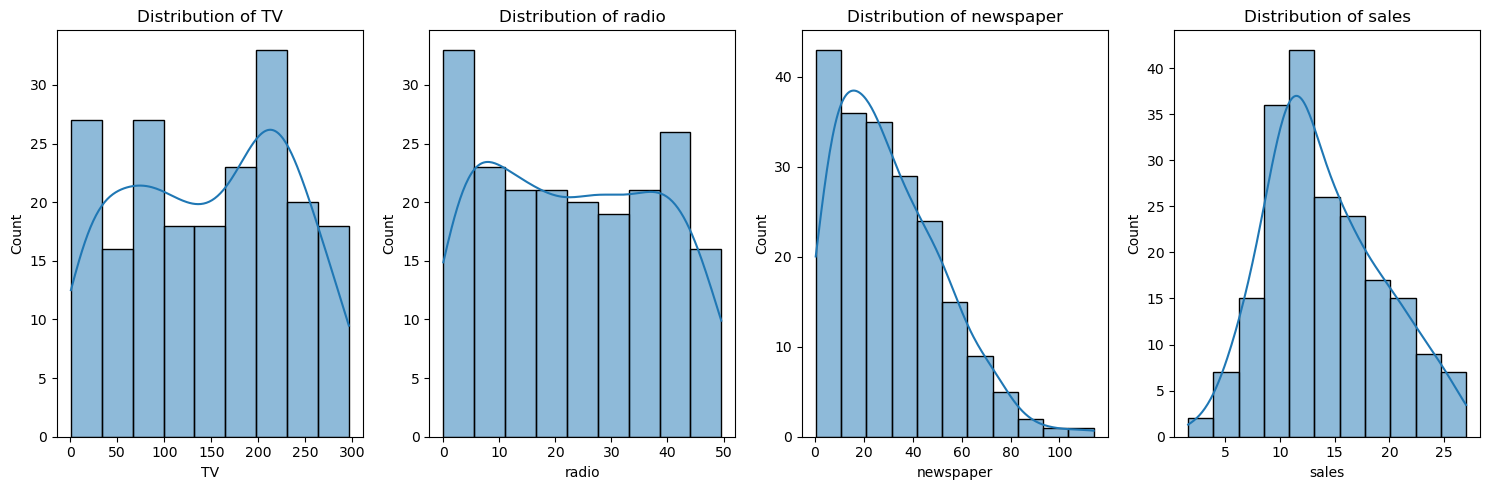

In [15]:
# Histograms for distributions
plt.figure(figsize=(15, 5))
for i, column in enumerate(['TV', 'radio', 'newspaper', 'sales'], start=1):
    plt.subplot(1, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title('Distribution of ' + column)
plt.tight_layout()
plt.show()

### Train Test Split of Data

In [16]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop('sales', axis=1)
y = df['sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the training and test sets
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (160, 3) (160,)
Test set: (40, 3) (40,)


### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

# Calculate the performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Output the performance metrics
print('Linear Regression MSE:', mse_linear)
print('Linear Regression R-squared:', r2_linear)

Linear Regression MSE: 3.1740973539761046
Linear Regression R-squared: 0.899438024100912


#### Making Sample Prediction

In [18]:
res=linear_reg.predict([[200,50,60]])

In [19]:
res[0]

21.550390404066754

In [20]:
res=linear_reg.predict([[100,30,60]])

In [21]:
res[0]

13.293537572507589

### Random Forest Regression

In [22]:
# Initialize the Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
rf_reg = RandomForestRegressor(n_estimators=50, random_state=7)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)

# Calculate the performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the performance metrics
print('Linear Regression MSE:', mse_rf)
print('Linear Regression R-squared:', r2_rf)

Linear Regression MSE: 0.553449999999998
Linear Regression R-squared: 0.9824655581242234


#### Making a Sample Prediction

In [23]:
res=rf_reg.predict([[200,50,60]])

In [24]:
res[0]

22.25400000000001

In [25]:
res=rf_reg.predict([[100,30,60]])

In [26]:
res[0]

13.949999999999996